<a href="https://colab.research.google.com/github/TruongVanDuc19146177/AI/blob/main/ANN_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.datasets import mnist 
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from random import randint
from skimage import color 
from google.colab.patches import cv2_imshow
 

In [ ]:
# tai du lieu 
(x_train,y_train) , (x_test,y_test) = mnist.load_data()

In [ ]:
X=x_test

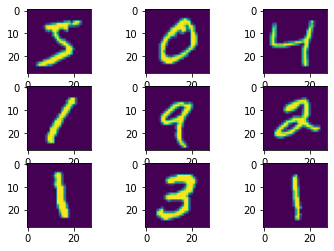

In [ ]:
import matplotlib.pyplot as plt
for i in range(9):
  plt.subplot(330+i+1)
  plt.imshow(x_train[i])
plt.show()

In [ ]:
classes =[0,1,2,3,4,5,6,7,8,9]

In [ ]:
#chuyen ve so thuc
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#chuyen thanh dang vecto 
x_test=x_test.reshape(10000,784)
x_train=x_train.reshape(60000,784)

#xu li du lieu 
x_train/=255
x_test/=255

#one hot encoding
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [ ]:
# Tạo Model
model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(784,)))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',optimizer=SGD(),metrics=['accuracy'])
history = model.fit(x_train,y_train, batch_size=128, epochs=100,verbose=1, validation_data=(x_test, y_test))
 
#luu model 
model.save('ANN_mnist.h5')

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 512)               401920    
                                                                 
 dense_13 (Dense)            (None, 512)               262656    
                                                                 
 dropout_6 (Dropout)         (None, 512)               0         
                                                                 
 dense_14 (Dense)            (None, 128)               65664     
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_15 (Dense)            (None, 10)                1290      
                                                                 
Total params: 731,530
Trainable params: 731,530
Non-tr

In [ ]:
#danh gia model
score = model.evaluate(x_test, y_test, verbose = 1)

313/313 [==============================] - 1s 3ms/step - loss: 0.0595 - accuracy: 0.9817


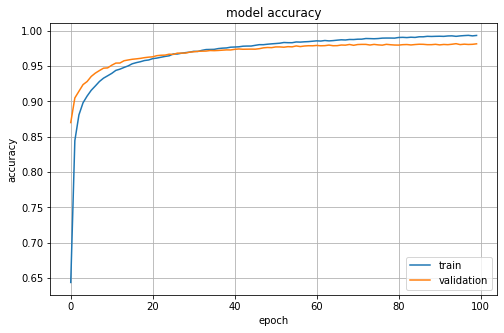

In [ ]:
# Graphs of accuracy
plt.figure(figsize=(8,5))
plt.grid(True)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='lower right')
plt.show()

1

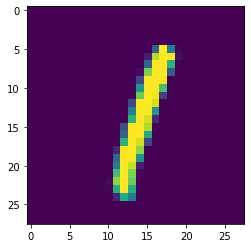

In [ ]:
y_pred=model.predict(x_test)
plt.imshow(X[5])
label=int(np.argmax(y_pred[5]))
classes[label]

0

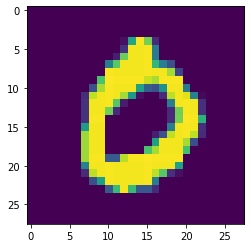

In [ ]:
y_pred=model.predict(x_test)
plt.imshow(X[3])
label=int(np.argmax(y_pred[3]))
classes[label]